In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from dotenv import load_dotenv
load_dotenv()
DATASET_PATH=os.getenv("DATASET_DIRECTORY")
CONFIG_DIRECTORY = os.getenv("CONFIG_DIRECTORY")

sys.path.append("../")
from mmwave_radar_processing.config_managers.cfgManager import ConfigManager
from cpsl_datasets.cpsl_ds import CpslDS
from mmwave_radar_processing.processors.synthetic_array_processor import SyntheticArrayProcessor
from mmwave_radar_processing.plotting.plotter_synthetic_array_data import PlotterSyntheticArrayData
from mmwave_radar_processing.processors.virtual_array_reformater import VirtualArrayReformatter
from mmwave_radar_processing.plotting.plotter_mmWave_data import PlotterMmWaveData
from mmwave_radar_processing.plotting.movies_mmWave_data import MovieGeneratorMmWaveData


In [2]:
cfg_manager = ConfigManager()

cfg_path = os.path.join(CONFIG_DIRECTORY,"RadSAR.cfg")
cfg_manager.load_cfg(cfg_path)
cfg_manager.compute_radar_perforance(profile_idx=0)

In [3]:
#load the dataset
dataset_name = "RadSAR_1_m_per_s"
dataset_path = os.path.join(DATASET_PATH,os.pardir,"RadSAR",dataset_name)
dataset = CpslDS(
    dataset_path=dataset_path,
    radar_folder="radar_0",
    lidar_folder="lidar",
    camera_folder="camera",
    imu_orientation_folder="imu_data",
    imu_full_folder="imu_data_full"
)

found 321 radar samples
found 321 lidar samples
found 321 camera samples
found 321 imu (orientation only) samples
found 321imu (full data) samples
found 321 vehicle velocity samples


In [4]:
synthetic_array_processor = SyntheticArrayProcessor(
    config_manager=cfg_manager
)

synthetic_array_plotter = PlotterSyntheticArrayData(
    config_manager=cfg_manager,
    synthetic_array_processor=synthetic_array_processor
)

In [5]:
idx = 0
while np.mean(dataset.get_vehicle_vel_data(idx)[:,1]) < 0.5:
    idx += 1
vel = np.mean(dataset.get_vehicle_vel_data(idx)[:,1])

synthetic_array_processor._generate_array_geometries(
    vels=np.array([-vel,0,0])
)

print(vel)
print(synthetic_array_processor.chirp_period_us * vel)
print(synthetic_array_processor.p_z_m[:,1])

0.5239124155675715
258.8127332903803
[0.00778682 0.00973352 0.01168023 0.01362693]


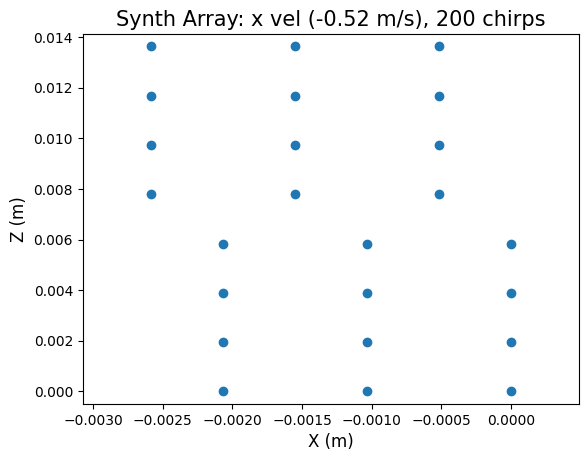

In [6]:
synthetic_array_plotter.plot_synthetic_array_geometry(
    vels=np.array([-vel,0,0]),
    show=True
)